<a href="https://colab.research.google.com/github/jithesh9539/Clustering_Techniques_CMPE255/blob/main/Clustering_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
customer_data=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
customer_data.shape

(200, 5)

In [10]:
customer_data.rename(columns={'Genre':'Gender'},inplace=True)

In [12]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

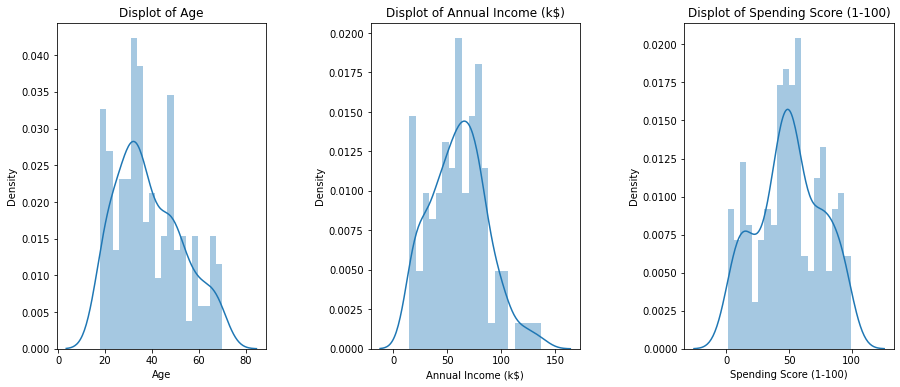

In [17]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n=n+1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.distplot(customer_data[x],bins=20)
  plt.title('Displot of {}'.format(x))
plt.show()

In [18]:
X= customer_data.loc[:,["Age","Spending Score (1-100)"]].values

In [19]:
X

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [22]:
k=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    k.append(kmeans.inertia_)

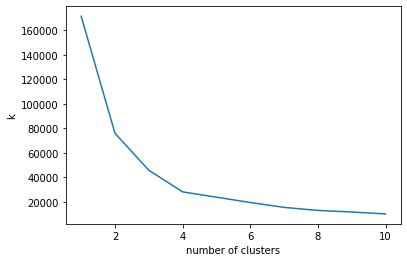

In [23]:
plt.plot(range(1,11), k)
plt.xlabel('number of clusters')
plt.ylabel('k')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

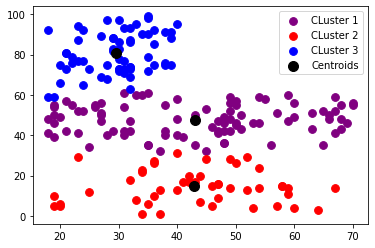

In [28]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=60, c='purple', label = 'CLuster 1')  

#  Here, X[y_kmeans==0,0] is X axis and X[y_kmeans==0,1] is Y axis
#  We're plotting scatters for cluster=0 i.e, our first cluster , in red color

plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=60, c='red', label = 'CLuster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=60, c='blue', label = 'CLuster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()

In [30]:
kmeans = KMeans(n_clusters=4, init = "k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

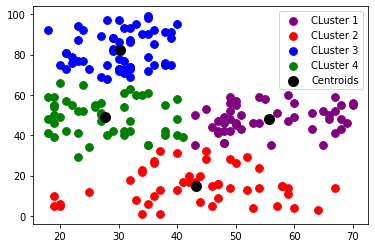

In [33]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=60, c='purple', label = 'CLuster 1')  

#  Here, X[y_kmeans==0,0] is X axis and X[y_kmeans==0,1] is Y axis
#  We're plotting scatters for cluster=0 i.e, our first cluster , in red color

plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=60, c='red', label = 'CLuster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=60, c='blue', label = 'CLuster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=60, c='green', label = 'CLuster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()

**Gaussian**

In [39]:
pip install gmr[all]

     |████████████████████████████████| 249 kB 30.7 MB/s 
     |████████████████████████████████| 66 kB 5.3 MB/s 
     |████████████████████████████████| 66 kB 5.7 MB/s 
  Created wheel for gmr: filename=gmr-1.6.2-py3-none-any.whl size=17495 sha256=0d1b44f03713d24be50e97781e1eeb7833decada0468462644ae0324f809f6e4
  Stored in directory: /root/.cache/pip/wheels/2e/e7/df/2abc66288a4ebba2af826b6c59d088d78be35162db0fd56527
Successfully built gmr


In [36]:
pip install gaussian

  Created wheel for gaussian: filename=gaussian-0.1-py3-none-any.whl size=4743 sha256=f8a98fc2675d9ebce5da7dcd6e665fa2401d1bed4b0a4db9acfbc379fc8c7e29
  Stored in directory: /root/.cache/pip/wheels/3c/df/12/18681bd7272788652de1d18a55d74300fdabefbef9ec0129a8
Successfully built gaussian


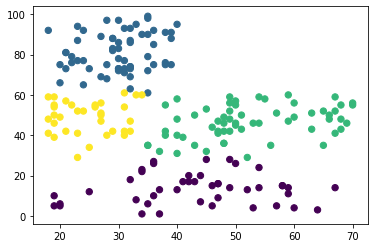

In [44]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

**Hierarchial_Clustering**

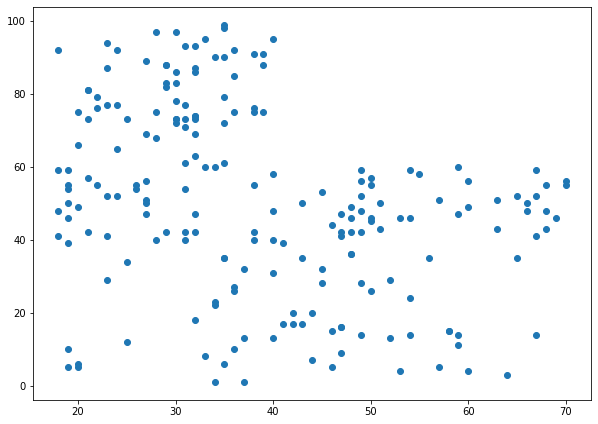

In [61]:
labels = range(1, 201)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0], X[:,1], label='True Positions')

**Single-Link**

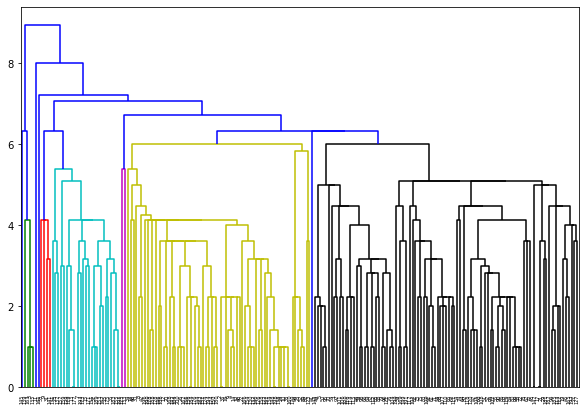

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(y=X, method='single')
labelList= range(1,201)
plt.figure(figsize=(10, 7))
dendrogram(linked,  orientation='top',labels=labelList,distance_sort='descending',show_leaf_counts=True)
plt.show()

**Complete-Link**

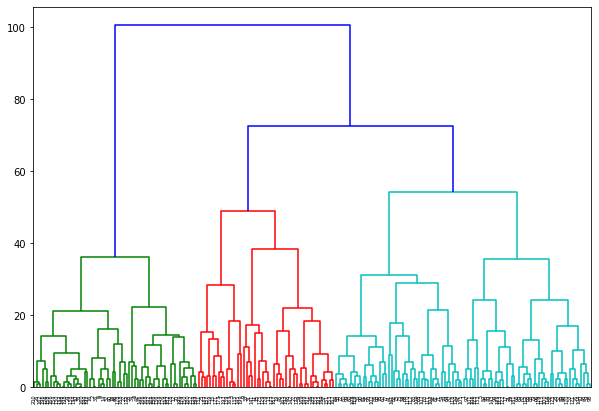

In [65]:
linked_complete= linkage(X, 'complete')
labelList= range(1, 201)
plt.figure(figsize=(10, 7))
dendrogram(linked_complete,  orientation='top',labels=labelList,distance_sort='descending',show_leaf_counts=True)
plt.show()  

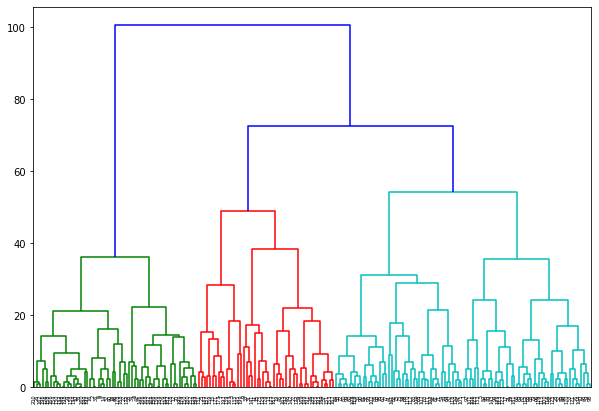

In [66]:
linked_average= linkage(X, 'average')
labelList= range(1, 201)
plt.figure(figsize=(10, 7))
dendrogram(linked_complete,  orientation='top',labels=labelList,distance_sort='descending',show_leaf_counts=True)
plt.show()

**DB_SCAN**

In [67]:
pip install pycaret[full]==2.3.4

     |████████████████████████████████| 266 kB 28.4 MB/s 
     |████████████████████████████████| 261 kB 57.4 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 6.8 MB 35.1 MB/s 
     |████████████████████████████████| 113 kB 23.5 MB/s 
     |████████████████████████████████| 1.3 MB 38.6 MB/s 
     |████████████████████████████████| 86 kB 6.0 MB/s 
     |████████████████████████████████| 1.7 MB 15.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.9 MB 1.3 MB/s 
     |████████████████████████████████| 167 kB 34.5 MB/s 
     |████████████████████████████████| 2.0 MB 51.8 MB/s 
     |████████████████████████████████| 54.7 MB 35 kB/s 
     |████████████████████████████████| 308 kB 44.3 MB/s 
     |████████████████████████████████| 100 kB 10.3 MB/s 
     |██████████████████

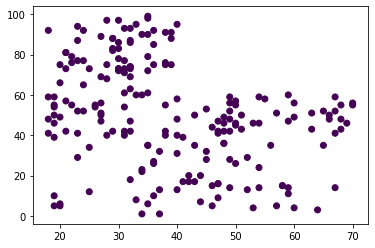

In [68]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);